# import packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
%matplotlib inline

# reading csv files

In [3]:

# Path to the data folder relative to the notebooks folder
folder_path = os.path.join('..','data')

# Construct the pattern to match all CSV files in the folder
pattern = os.path.join(folder_path, '*.csv')

# Use glob.glob to find all files matching the pattern
csv_files = glob.glob(pattern)

# Print the list of CSV file paths
for csv_file in csv_files:
    print(csv_file)
    # print(csv_file.split('\\')[-1].split('.')[0])
    



..\data\colors.csv
..\data\inventories.csv
..\data\inventory_parts.csv
..\data\inventory_sets.csv
..\data\parts.csv
..\data\part_categories.csv
..\data\sets.csv
..\data\themes.csv


In [4]:
# Dictionary to hold your dataframes
dataframes = {}

for file_path in csv_files:
    # Extract the file name without extension
    file_name = os.path.splitext(os.path.basename(file_path))[0]
    # Read the CSV file and assign it to a key in the dictionary
    dataframes[file_name] = pd.read_csv(file_path)

In [5]:
for key,value in dataframes.items():
    print(key)
    print(value.head())
    print('-----------------------')

colors
   id            name     rgb is_trans
0  -1         Unknown  0033B2        f
1   0           Black  05131D        f
2   1            Blue  0055BF        f
3   2           Green  237841        f
4   3  Dark Turquoise  008F9B        f
-----------------------
inventories
   id  version set_num
0   1        1  7922-1
1   3        1  3931-1
2   4        1  6942-1
3  15        1  5158-1
4  16        1   903-1
-----------------------
inventory_parts
   inventory_id     part_num  color_id  quantity is_spare
0             1     48379c01        72         1        f
1             1        48395         7         1        f
2             1     mcsport6        25         1        f
3             1       paddle         0         1        f
4             3  11816pr0005        78         1        f
-----------------------
inventory_sets
   inventory_id  set_num  quantity
0            35  75911-1         1
1            35  75912-1         1
2            39  75048-1         1
3            39  7

In [6]:
# Dictionary hold all those csv files,if want to call colors.csv , use dataframes['colors']
dataframes['colors']

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f
...,...,...,...,...
130,1004,Trans Flame Yellowish Orange,FCB76D,t
131,1005,Trans Fire Yellow,FBE890,t
132,1006,Trans Light Royal Blue,B4D4F7,t
133,1007,Reddish Lilac,8E5597,f


# check csv files

#### inventories table

In [7]:
dataframes['inventories'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11681 entries, 0 to 11680
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       11681 non-null  int64 
 1   version  11681 non-null  int64 
 2   set_num  11681 non-null  object
dtypes: int64(2), object(1)
memory usage: 273.9+ KB


In [8]:
dataframes['inventories']['id'].nunique() # id is unique

11681

In [9]:
dataframes['inventories']['set_num'].nunique() # set_num is not unique

11670

In [10]:
# set_num + version is unique, so each set_num + version has an unique id in this inventories table
dataframes['inventories'][dataframes['inventories'].duplicated(['set_num','version'], keep=False)] 

,id,version,set_num


#### inventory_sets

In [11]:
dataframes['inventory_sets'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2846 entries, 0 to 2845
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   inventory_id  2846 non-null   int64 
 1   set_num       2846 non-null   object
 2   quantity      2846 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 66.8+ KB


In [12]:
dataframes['inventory_sets']['inventory_id'].nunique() # inventory_id is not unique

589

In [33]:
dataframes['inventory_sets']['inventory_id'].value_counts()

inventory_id
2514    30
6174    24
9926    24
7881    24
6702    24
        ..
9765     1
6034     1
4719     1
4666     1
1791     1
Name: count, Length: 589, dtype: int64

In [35]:
df_id_2514 = dataframes['inventory_sets'][dataframes['inventory_sets']['inventory_id']==2514]
df_id_2514

,inventory_id,set_num,quantity
411,2514,4443-1,1
412,2514,4444-1,1
413,2514,4445-1,1
414,2514,4446-1,1
415,2514,4447-1,1
416,2514,4448-1,1
417,2514,4449-1,1
418,2514,4450-1,1
419,2514,4451-1,1
420,2514,4452-1,1


In [41]:
# when a inventory_id has 30 set ?
# merge sets name to this to check
df_id_2514.merge(dataframes['sets'],on='set_num',how='inner')

,inventory_id,set_num,quantity,name,year,theme_id,num_parts
0,2514,4443-1,1,Coca-Cola Defender 1,2002,462,4
1,2514,4444-1,1,Coca-Cola Defender 2,2002,462,4
2,2514,4445-1,1,Coca-Cola Middle Fielder 1,2002,462,4
3,2514,4446-1,1,Coca-Cola Forward 1,2002,462,4
4,2514,4447-1,1,Coca-Cola Forward 2,2002,462,4
5,2514,4448-1,1,Coca-Cola Defender 3,2002,462,4
6,2514,4449-1,1,Coca-Cola Defender 4,2002,462,4
7,2514,4450-1,1,Coca-Cola Middle Fielder 2,2002,462,4
8,2514,4451-1,1,Coca-Cola Forward 3,2002,462,4
9,2514,4452-1,1,Coca-Cola Forward 4,2002,462,4


## !!!! from above table, the same inventory_id (2514) related to 30 different sets !

In [60]:
dataframes['inventory_parts'][dataframes['inventory_parts']['inventory_id'] ==2514]

,inventory_id,part_num,color_id,quantity,is_spare


In [42]:
# check 2514 in inventories table
dataframes['inventories'][dataframes['inventories']['id'] == 2514]

,id,version,set_num
1746,2514,1,cokesoccer-1


In [43]:
# find set_num( cokesoccer-1) in sets
dataframes['sets'][dataframes['sets']['set_num'] =='cokesoccer-1' ]

,set_num,name,year,theme_id,num_parts
11090,cokesoccer-1,Japanese Coca-Cola Soccer collection sets 4443...,2002,462,30


In [39]:
df_id_2514['set_num'].nunique() == len(df_id_2514)

True

In [13]:
dataframes['inventory_sets']['set_num'].nunique() # the number of set_num's unique value > than inventory_id unique value

2306

In [14]:
dataframes['inventory_sets'][dataframes['inventory_sets'].duplicated(['set_num','inventory_id'], keep=False)]  # set_num + inventory_id is unique

,inventory_id,set_num,quantity


## themes

In [15]:
dataframes['themes']

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0
...,...,...,...
609,610,Brickheadz,NaN
610,611,Series 17 Minifigures,535.0
611,612,Star Wars Episode 8,158.0
612,613,Freemakers,158.0


In [16]:
dataframes['themes']['name'].value_counts()

name
Supplemental             18
Fire                     12
Airport                  11
Traffic                   9
Harbor                    9
                         ..
Studios                   1
SpongeBob SquarePants     1
Prince of Persia          1
Ben 10                    1
Freemakers                1
Name: count, Length: 402, dtype: int64

In [27]:
# show the rows with duplicates names
dataframes['themes'][dataframes['themes'].duplicated(subset=['name'], keep=False)].sort_values(by='name')

,id,name,parent_id
241,242,12V,241.0
233,234,12V,233.0
278,279,4 Juniors,NaN
507,508,4 Juniors,507.0
234,235,4.5V,233.0
...,...,...,...
422,423,Vehicle,411.0
423,424,Western,411.0
474,475,Western,NaN
104,105,World City,50.0


## sets

In [17]:
dataframes['sets']['name'].value_counts()

name
Basic Building Set                     55
Universal Building Set                 32
Helicopter                             23
Basic Set                              23
Fire Station                           14
                                       ..
EV3 Core Set                            1
EV3 Expansion Set                       1
Space Challenge Set                     1
Freight Loading Station                 1
Wild West Limited Edition Gift Pack     1
Name: count, Length: 10370, dtype: int64

In [49]:
dataframes['sets'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11673 entries, 0 to 11672
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   set_num    11673 non-null  object
 1   name       11673 non-null  object
 2   year       11673 non-null  int64 
 3   theme_id   11673 non-null  int64 
 4   num_parts  11673 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 456.1+ KB


## inventory_parts

In [28]:
# what is the inventory_id : part ? set ? is it unique?
# inventory_id = set + version = we can call it uni_set_id
dataframes['inventory_parts'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580251 entries, 0 to 580250
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   inventory_id  580251 non-null  int64 
 1   part_num      580251 non-null  object
 2   color_id      580251 non-null  int64 
 3   quantity      580251 non-null  int64 
 4   is_spare      580251 non-null  object
dtypes: int64(3), object(2)
memory usage: 22.1+ MB


In [29]:
dataframes['inventory_parts']['inventory_id'].nunique()
# inventory_id is not unique is table inventory parts

10724

In [30]:
dataframes['inventory_parts']['inventory_id'].value_counts()

inventory_id
1305     769
12397    700
8461     687
16139    593
14208    592
        ... 
14811      1
9064       1
9037       1
9036       1
1129       1
Name: count, Length: 10724, dtype: int64

In [32]:
# for inventory_id 1305
dataframes['inventory_parts'][dataframes['inventory_parts']['inventory_id']==1305]

,inventory_id,part_num,color_id,quantity,is_spare
43090,1305,10170,84,1,f
43091,1305,11062,15,2,f
43092,1305,11090,14,8,f
43093,1305,11090,0,4,f
43094,1305,11153,71,2,f
...,...,...,...,...,...
43854,1305,99207,0,5,f
43855,1305,99780,15,1,f
43856,1305,99780,71,1,f
43857,1305,99780,0,1,f


In [50]:
dataframes['inventories'][dataframes['inventories']['id']==1305]

,id,version,set_num
905,1305,1,10255-1


In [51]:
dataframes['sets'][dataframes['sets']['set_num']=='10255-1']

,set_num,name,year,theme_id,num_parts
236,10255-1,Assembly Square,2017,155,4009


In [57]:
dataframes['inventory_sets'][dataframes['inventory_sets']['set_num']=='10255-1']

,inventory_id,set_num,quantity


## part_categories

In [45]:
dataframes['part_categories']

,id,name
0,1,Baseplates
1,2,Bricks Printed
2,3,Bricks Sloped
3,4,"Duplo, Quatro and Primo"
4,5,Bricks Special
5,6,Bricks Wedged
6,7,Containers
7,8,Technic Bricks
8,9,Plates Special
9,10,Tiles Printed


## parts

In [46]:
dataframes['parts'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25993 entries, 0 to 25992
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   part_num     25993 non-null  object
 1   name         25993 non-null  object
 2   part_cat_id  25993 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 609.3+ KB


In [48]:
dataframes['parts']['part_num'].nunique()

25993

## inventories

In [58]:
dataframes['inventories'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11681 entries, 0 to 11680
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       11681 non-null  int64 
 1   version  11681 non-null  int64 
 2   set_num  11681 non-null  object
dtypes: int64(2), object(1)
memory usage: 273.9+ KB


In [59]:
dataframes['inventories'].head()

,id,version,set_num
0,1,1,7922-1
1,3,1,3931-1
2,4,1,6942-1
3,15,1,5158-1
4,16,1,903-1


In [ ]:
# group discussion:
'''
Pinky: Average number of lego pieces per box
Nandar: Overall top 5 most popular theme
Hassan:  Could you predict which theme a set is from just by the bricks it contains?
Daisy: top5 MOST COMMOM and rare parts
'''

# Could you predict which theme a set is from just by the bricks it contains?

In [ ]:
# Hassan:  Could you predict which theme a set is from just by the bricks it contains?
'''
step 1: merge table: to get theme ~ part_Name relationship table
        parts + 
        inventory_parts(uni_set_id ~ part_num) +
        inventories (uni_set_id ~ set_num) +
        sets (set_num ~ theme_id) +
        themes (theme_id ~ name)
step 2: through merged table above, we can calculate that for a certain part,
        what is the change of this part is from a themes
        change = number of this part in a certain theme / total parts number of this theme 
'''

## Merge tables for Hassan's Question


In [61]:
df_h = dataframes['inventory_parts'].merge(dataframes['inventories'],
                                           left_on =['inventory_id'],
                                           right_on=['id'],
                                           how='left')

In [62]:
df_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580251 entries, 0 to 580250
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   inventory_id  580251 non-null  int64 
 1   part_num      580251 non-null  object
 2   color_id      580251 non-null  int64 
 3   quantity      580251 non-null  int64 
 4   is_spare      580251 non-null  object
 5   id            580251 non-null  int64 
 6   version       580251 non-null  int64 
 7   set_num       580251 non-null  object
dtypes: int64(5), object(3)
memory usage: 35.4+ MB


In [63]:
dataframes['inventory_parts'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580251 entries, 0 to 580250
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   inventory_id  580251 non-null  int64 
 1   part_num      580251 non-null  object
 2   color_id      580251 non-null  int64 
 3   quantity      580251 non-null  int64 
 4   is_spare      580251 non-null  object
dtypes: int64(3), object(2)
memory usage: 22.1+ MB


In [64]:
df_h = df_h.merge(dataframes['sets'],
                  on ='set_num',
                  how = 'left',
                  )

In [65]:
df_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580251 entries, 0 to 580250
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   inventory_id  580251 non-null  int64 
 1   part_num      580251 non-null  object
 2   color_id      580251 non-null  int64 
 3   quantity      580251 non-null  int64 
 4   is_spare      580251 non-null  object
 5   id            580251 non-null  int64 
 6   version       580251 non-null  int64 
 7   set_num       580251 non-null  object
 8   name          580251 non-null  object
 9   year          580251 non-null  int64 
 10  theme_id      580251 non-null  int64 
 11  num_parts     580251 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 53.1+ MB


In [67]:
# merge theme
df_h = df_h.merge(dataframes['themes'],
                  left_on = 'theme_id',
                  right_on ='id',
                  how = 'left',
                  suffixes = ('','_themes')
                  )

In [68]:
df_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580251 entries, 0 to 580250
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   inventory_id  580251 non-null  int64  
 1   part_num      580251 non-null  object 
 2   color_id      580251 non-null  int64  
 3   quantity      580251 non-null  int64  
 4   is_spare      580251 non-null  object 
 5   id            580251 non-null  int64  
 6   version       580251 non-null  int64  
 7   set_num       580251 non-null  object 
 8   name          580251 non-null  object 
 9   year          580251 non-null  int64  
 10  theme_id      580251 non-null  int64  
 11  num_parts     580251 non-null  int64  
 12  id_themes     580251 non-null  int64  
 13  name_themes   580251 non-null  object 
 14  parent_id     372558 non-null  float64
dtypes: float64(1), int64(9), object(5)
memory usage: 66.4+ MB


In [69]:
# merge parts
df_h = df_h.merge(dataframes['parts'],
                  left_on = 'part_num',
                  right_on ='part_num',
                  how = 'left',
                  suffixes = ('','_parts')
                  )

In [70]:
df_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580251 entries, 0 to 580250
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   inventory_id  580251 non-null  int64  
 1   part_num      580251 non-null  object 
 2   color_id      580251 non-null  int64  
 3   quantity      580251 non-null  int64  
 4   is_spare      580251 non-null  object 
 5   id            580251 non-null  int64  
 6   version       580251 non-null  int64  
 7   set_num       580251 non-null  object 
 8   name          580251 non-null  object 
 9   year          580251 non-null  int64  
 10  theme_id      580251 non-null  int64  
 11  num_parts     580251 non-null  int64  
 12  id_themes     580251 non-null  int64  
 13  name_themes   580251 non-null  object 
 14  parent_id     372558 non-null  float64
 15  name_parts    580069 non-null  object 
 16  part_cat_id   580069 non-null  float64
dtypes: float64(2), int64(9), object(6)
memory usage:

In [71]:
# merge part_categories
df_h = df_h.merge(dataframes['part_categories'],
                  left_on = 'part_cat_id',
                  right_on ='id',
                  how = 'left',
                  suffixes = ('','_part_cat')
                  )

In [72]:
df_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580251 entries, 0 to 580250
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   inventory_id   580251 non-null  int64  
 1   part_num       580251 non-null  object 
 2   color_id       580251 non-null  int64  
 3   quantity       580251 non-null  int64  
 4   is_spare       580251 non-null  object 
 5   id             580251 non-null  int64  
 6   version        580251 non-null  int64  
 7   set_num        580251 non-null  object 
 8   name           580251 non-null  object 
 9   year           580251 non-null  int64  
 10  theme_id       580251 non-null  int64  
 11  num_parts      580251 non-null  int64  
 12  id_themes      580251 non-null  int64  
 13  name_themes    580251 non-null  object 
 14  parent_id      372558 non-null  float64
 15  name_parts     580069 non-null  object 
 16  part_cat_id    580069 non-null  float64
 17  id_part_cat    580069 non-nul

## cleaning data

In [73]:
# remove all rows with name_part_cat is null or Non-LEGO
df_h.fillna('null',inplace=True)
df_h = df_h[~df_h['name_part_cat'].isin(['null','Non-LEGO'])]

C:\Users\wudan\AppData\Local\Temp\ipykernel_17912\659088036.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'null' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_h.fillna('null',inplace=True)


In [74]:
df_h.info()

<class 'pandas.core.frame.DataFrame'>
Index: 577906 entries, 0 to 580250
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   inventory_id   577906 non-null  int64 
 1   part_num       577906 non-null  object
 2   color_id       577906 non-null  int64 
 3   quantity       577906 non-null  int64 
 4   is_spare       577906 non-null  object
 5   id             577906 non-null  int64 
 6   version        577906 non-null  int64 
 7   set_num        577906 non-null  object
 8   name           577906 non-null  object
 9   year           577906 non-null  int64 
 10  theme_id       577906 non-null  int64 
 11  num_parts      577906 non-null  int64 
 12  id_themes      577906 non-null  int64 
 13  name_themes    577906 non-null  object
 14  parent_id      577906 non-null  object
 15  name_parts     577906 non-null  object
 16  part_cat_id    577906 non-null  object
 17  id_part_cat    577906 non-null  object
 18  name_part

In [86]:
# how much parts does on theme have ?
df_theme_parts_num = df_h.groupby(['name_themes'])[['quantity']].sum().sort_values(by='quantity',ascending=False).reset_index()
df_theme_parts_num.head(5)

,name_themes,quantity
0,Basic Set,100970
1,Star Wars Episode 4/5/6,88797
2,Technic,54115
3,Construction,53117
4,Creator,49025


## create function to calculate the probability of a certain part from a theme

In [109]:
# for a certain part, what is the change of inside each theme
# chance = number of this part in each theme / theme total part num
def chance_in_theme(part_name=None, part_num=None):
    # Filter based on provided parameters
    if part_name is not None and part_num is not None:
        df_part = df_h[(df_h['name_parts'] == part_name) & (df_h['part_num'] == part_num)]
    elif part_name is not None:
        df_part = df_h[df_h['name_parts'] == part_name]
    elif part_num is not None:
        df_part = df_h[df_h['part_num'] == part_num]
    else:
        return "Please provide at least one of the parameters: part_name or part_num"

    # Group by 'name_themes', sum 'quantity', and calculate 'chance'
    df_part_num = df_part.groupby(['name_themes'])[['quantity']].sum().sort_values(by='quantity', ascending=False)
    df_part_num['chance'] = df_part_num['quantity'] / df_part_num['quantity'].sum() * 100

    return df_part_num['chance'].sort_values(ascending=False)


In [178]:
chance_in_theme(part_num='4j001')

name_themes
Gas Station    50.0
Traffic        50.0
Name: chance, dtype: float64

## function for creating a pie chart of probability of themes

In [192]:
def plot_change2(part_name=None,part_num= None):
    '''
    show the probability of this part's theme
    input: part_name or part_num
    output: piechart of probability of which theme does this part from
    '''

    series = chance_in_theme(part_name=part_name,part_num=part_num)
    part_name = part_name or ''
    part_num = part_num or ''

    plt.plot()
    plt.pie(series,labels=series.index,autopct='%1.1f%%', startangle=140)
    plt.legend(loc ='upper left',title = series.name,fontsize='small', bbox_to_anchor=(1, 1))
    plt.title('Probability of a part "%s" from Themes' % (part_name + part_num))
    plt.show()

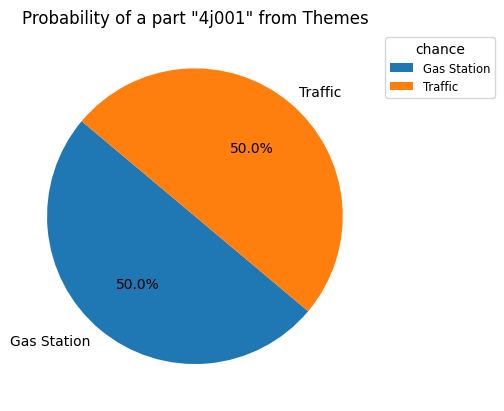

In [191]:
plot_change2(part_num='4j001')

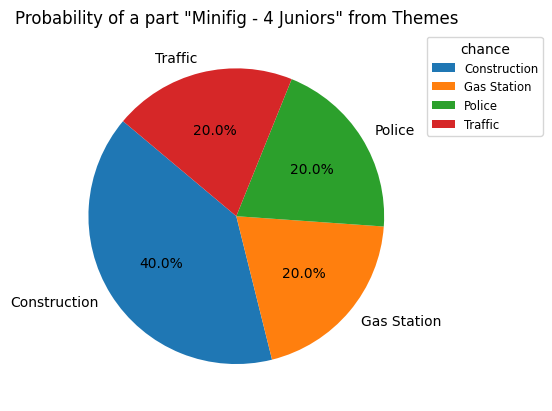

In [190]:
plot_change2(part_name = 'Minifig - 4 Juniors')

In [193]:
help(plot_change2)

Help on function plot_change2 in module __main__:

plot_change2(part_name=None, part_num=None)
    show the probability of this part's theme
    input: part_name or part_num
    output: piechart of probability of which theme does this part from

